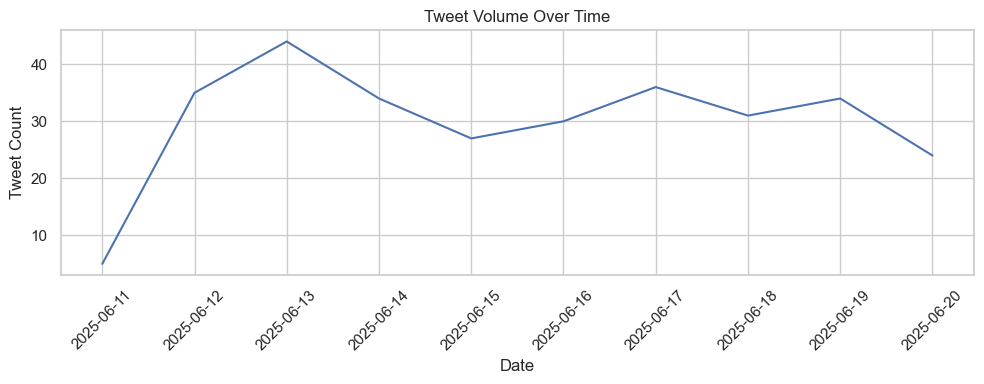

C:\Users\elidrissi\AppData\Local\Temp\ipykernel_1716\2187638257.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


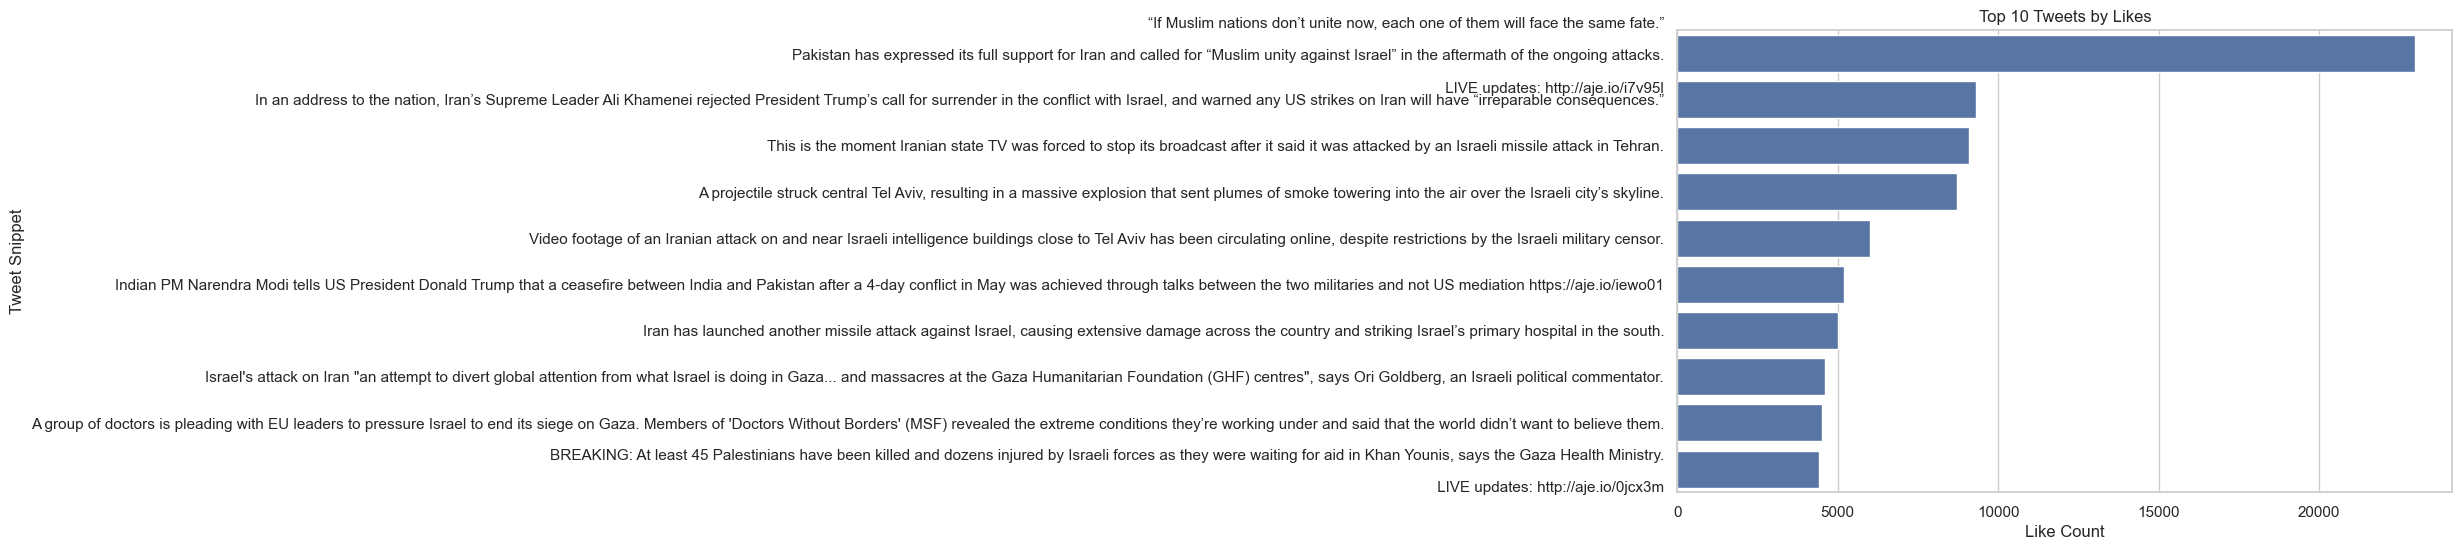

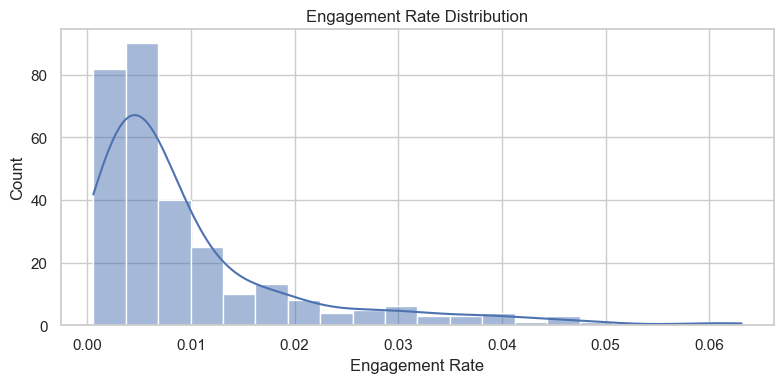

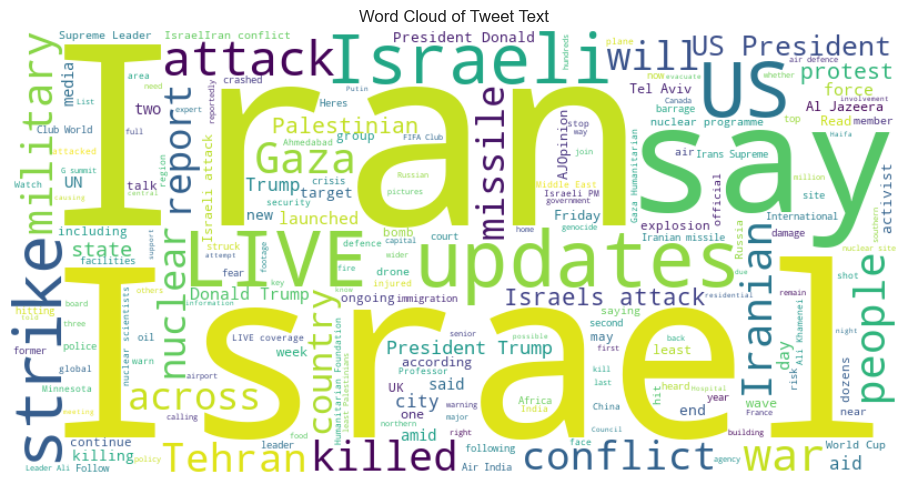

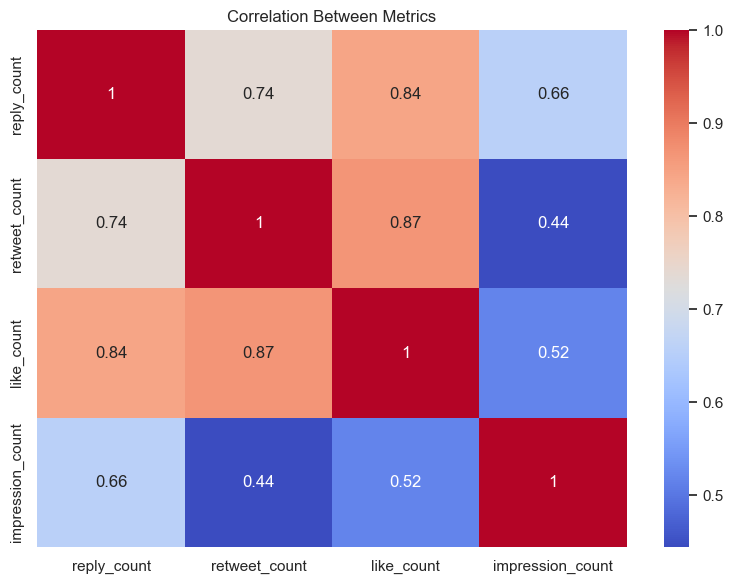

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import re
from collections import Counter

# Load tweets from JSON file
with open('tweets_20250620_191420.json', 'r', encoding='utf-8') as f:
    tweets = json.load(f)

# Convert to DataFrame
data = pd.DataFrame([{
    'id': t['id'],
    'text': t['text'],
    'date': pd.to_datetime(t['date']),
    'reply_count': t['metrics']['reply_count'],
    'retweet_count': t['metrics']['retweet_count'],
    'like_count': t['metrics']['like_count'],
    'quote_count': t['metrics']['quote_count'],
    'bookmark_count': t['metrics']['bookmark_count'],
    'impression_count': t['metrics']['impression_count'],
    'url': t['url']
} for t in tweets])

# Add engagement rate
engagement_cols = ['reply_count', 'retweet_count', 'like_count']
data['engagement_rate'] = data[engagement_cols].sum(axis=1) / data['impression_count']

# ====== VISUALIZATION ======
sns.set(style='whitegrid')

# 1. Tweet volume over time
plt.figure(figsize=(10, 4))
data['date'].dt.date.value_counts().sort_index().plot()
plt.title("Tweet Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 tweets by likes
top_likes = data.nlargest(10, 'like_count')
plt.figure(figsize=(10, 6))
sns.barplot(x='like_count', y='text', data=top_likes)
plt.title("Top 10 Tweets by Likes")
plt.xlabel("Like Count")
plt.ylabel("Tweet Snippet")
plt.tight_layout()
plt.show()

# 3. Engagement rate distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['engagement_rate'], bins=20, kde=True)
plt.title("Engagement Rate Distribution")
plt.xlabel("Engagement Rate")
plt.tight_layout()
plt.show()

# 4. Word Cloud of tweet content
all_text = ' '.join(data['text'].tolist())
all_text = re.sub(r'http\S+|https\S+', '', all_text)  # remove URLs
all_text = re.sub(r'[^a-zA-Z\s]', '', all_text)  # remove punctuation

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tweet Text")
plt.tight_layout()
plt.show()

# 5. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[engagement_cols + ['impression_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Metrics")
plt.tight_layout()
plt.show()


## 1. Tweets per hour (activity pattern)
### Understand when AJEnglish tweets most.

C:\Users\elidrissi\AppData\Local\Temp\ipykernel_1716\2034561523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=data, palette='viridis')


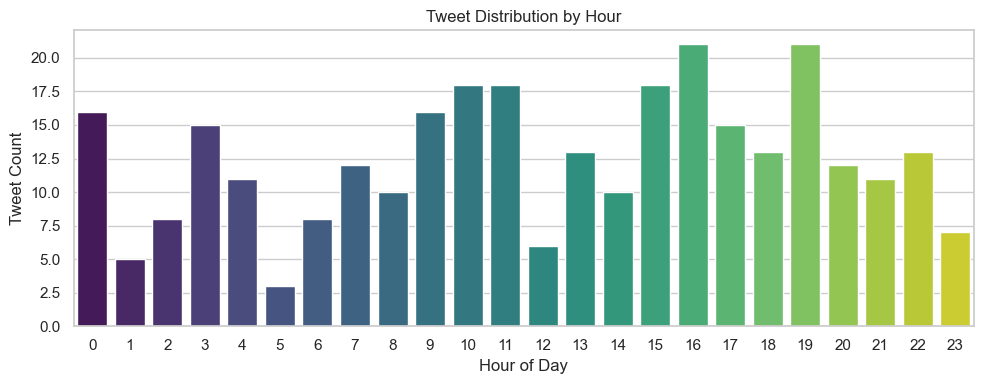

In [4]:
plt.figure(figsize=(10, 4))
data['hour'] = data['date'].dt.hour
sns.countplot(x='hour', data=data, palette='viridis')
plt.title("Tweet Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()

## 2. Engagement breakdown per tweet
### See how each metric contributes visually.

C:\Users\elidrissi\AppData\Local\Temp\ipykernel_1716\2284571966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric', y='Count', data=melted, palette='pastel')


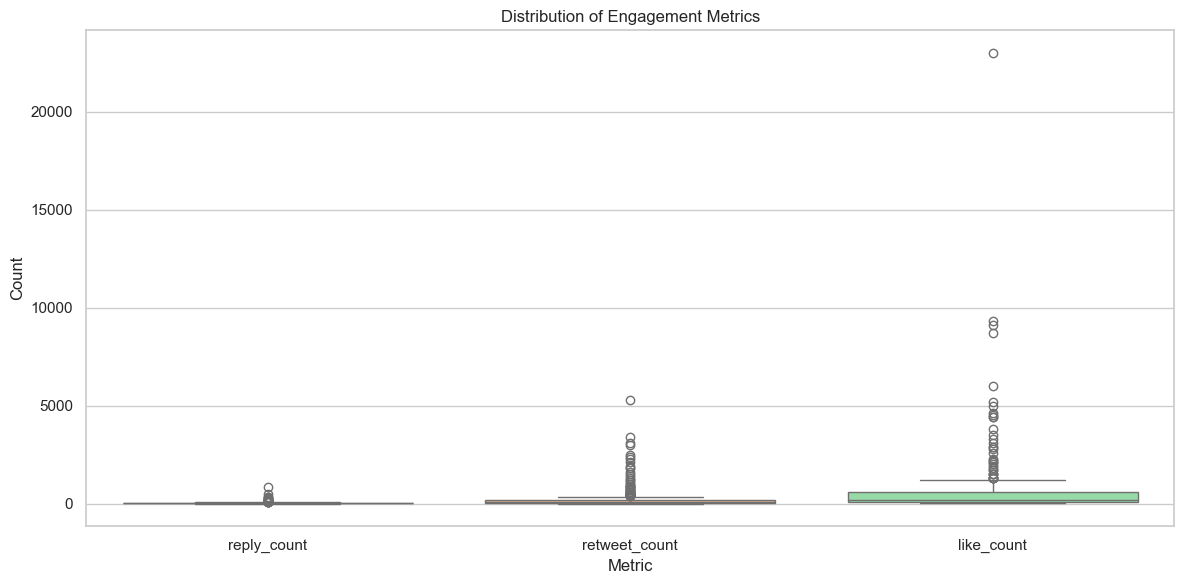

In [5]:
melted = data[['id', 'reply_count', 'retweet_count', 'like_count']].melt(id_vars='id', var_name='Metric', value_name='Count')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Metric', y='Count', data=melted, palette='pastel')
plt.title("Distribution of Engagement Metrics")
plt.tight_layout()
plt.show()

## 3. Top words (Bar chart)
### Use Counter for a readable top-words chart.

C:\Users\elidrissi\AppData\Local\Temp\ipykernel_1716\1990982847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette='muted')


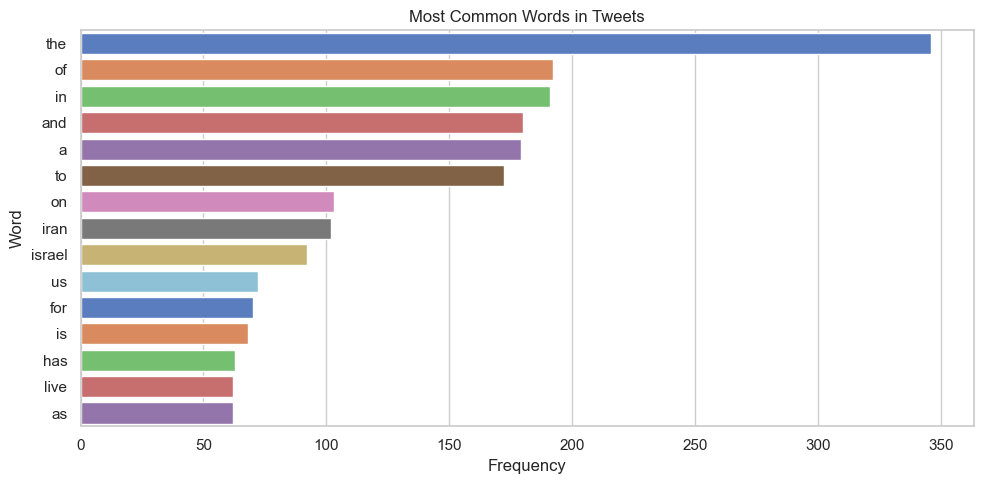

In [6]:
from collections import Counter

words = all_text.lower().split()
common_words = Counter(words).most_common(15)
labels, values = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(values), y=list(labels), palette='muted')
plt.title("Most Common Words in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()
